<h1 align="center"> Assignment 3 </h1>

In [1]:
import numpy as np

## Q1

In [2]:
def data(file_path):
    f = np.loadtxt(file_path, delimiter=',', skiprows=1)
    y, X = np.hsplit(f, [1])
    return X/255, np.eye(10)[y.astype(int).flatten()]

X, y = data('mnist_train.csv')
print(X.shape, y.shape)

(60000, 784) (60000, 10)


## Q2

In [3]:
class Network:
    def __init__(self, X, y, W, b, learning_rate):
        self.X = X
        self.y = y
        self.W = W
        self.b = b
        self.learning_rate = learning_rate

    def softmax(self, z):
        e_z = np.exp(z)
        return e_z / e_z.sum(axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-100)) / samples
    
    def feed_forward(self):
        z = np.dot(self.X, self.W) + self.b
        a = self.softmax(z)
        return a
    
    def backward_propagation(self):
        dz = self.y_pred - self.y
        dW = (1/samples) * np.dot(self.X.T, dz)
        db = (1/samples) * np.sum(dz, axis=0, keepdims=True)  
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self.W, self.b
    
    def train(self):
        self.y_pred = self.feed_forward()
        self.loss = self.cross_entropy_loss(self.y, self.y_pred)
        self.W, self.b = self.backward_propagation()
        return self.W, self.b, self.loss
    

classes = 10
samples = 60000
image_dim = 28
W = np.random.rand(image_dim**2, classes)
b = np.random.rand(1, classes)
learning_rate = 0.01

nn = Network(X, y, W, b, learning_rate)
W, b, loss = nn.train()
print("\nWeights: ", W)
print("\nBias: ", b)
print("\nLoss: ", loss)


Weights:  [[0.47951206 0.07883346 0.48735643 ... 0.692196   0.47569832 0.08443742]
 [0.8893862  0.22574533 0.81552453 ... 0.16170143 0.22919909 0.54176543]
 [0.80632959 0.97134511 0.77494957 ... 0.46563653 0.03842637 0.90185028]
 ...
 [0.88002032 0.59986718 0.30881364 ... 0.83595749 0.57593267 0.0757345 ]
 [0.66841381 0.51205339 0.20764443 ... 0.61761481 0.75601462 0.03723043]
 [0.90099395 0.64954074 0.8184798  ... 0.30199948 0.41245826 0.99797078]]

Bias:  [[0.64011487 0.79749696 0.16366571 0.1148001  0.88020093 0.34260314
  0.12497425 0.82650062 0.06666921 0.07837925]]

Loss:  5.5277321729544635


## Q3

In [4]:
class Network:
    def __init__(self, X, y, W, b, learning_rate):
        self.X = X
        self.y = y
        self.W = W
        self.b = b
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        e_z = np.exp(z)
        return e_z / e_z.sum(axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-100)) / samples
    
    def feed_forward(self, X, W, b):
        # print((np.dot(X, W[0]).shape, b[0].shape))
        a1 = self.sigmoid((np.dot(X, W[0]) + b[0]).astype(float))
        a2 = self.softmax((np.dot(a1, W[1]) + b[1]).astype(float))
        a = [a1, a2]
        return a
    
    def backward_propagation(self, X, a, W, b):
        dz2 = a[1] - self.y
        dW2 = (1/samples) * np.dot(a[0].T, dz2)
        db2 = (1/samples) * np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, W[1].T) * (a[0] * (1 - a[0])) 
        dW1 = (1/samples) * np.dot(X.T, dz1)
        db1 = (1/samples) * np.sum(dz1, axis=0, keepdims=True)
        W[0] = W[0] - self.learning_rate * dW1
        W[1] = W[1] - self.learning_rate * dW2
        b[0] = b[0] - self.learning_rate * db1
        b[1] = b[1] - self.learning_rate * db2
        return W, b
    
    def train(self):
        a = self.feed_forward(self.X, self.W, self.b)
        loss = self.cross_entropy_loss(self.y, a[1])
        W, b = self.backward_propagation(self.X, a, self.W, self.b)
        return W, b, loss


classes = 10
samples = 60000
image_dim = 28
n = 15
W = [np.random.rand(image_dim**2, n), np.random.rand(n, classes)]
b = [np.random.rand(1, n), np.random.rand(1, classes)]
learning_rate = 0.01

nn = Network(X, y, W, b, learning_rate)
W, b, loss = nn.train()
print("\nWeights: ", W)
print("\nBias: ", b)
print("\nLoss: ", loss)


Weights:  [array([[0.10284916, 0.34005148, 0.44305252, ..., 0.37313268, 0.74045841,
        0.21921329],
       [0.14333583, 0.47552898, 0.9919205 , ..., 0.69433463, 0.28326331,
        0.05895841],
       [0.62691706, 0.27681509, 0.44158828, ..., 0.72428842, 0.31629683,
        0.39631339],
       ...,
       [0.23593546, 0.98690998, 0.55848149, ..., 0.98255528, 0.46225439,
        0.80411653],
       [0.53341282, 0.95722102, 0.38196526, ..., 0.12261942, 0.19300923,
        0.48934213],
       [0.5472537 , 0.43592915, 0.88781541, ..., 0.3662114 , 0.58175571,
        0.31459205]]), array([[8.60362137e-01, 1.04343652e-01, 1.60345292e-01, 7.21381962e-01,
        5.54623260e-01, 9.72781458e-01, 7.38364326e-01, 5.28075515e-01,
        5.23957456e-01, 3.41672558e-01],
       [3.15814865e-02, 6.07937192e-01, 6.53679262e-01, 3.27453818e-01,
        6.76777394e-01, 4.62488664e-01, 9.01266500e-01, 6.56402229e-01,
        1.15478851e-01, 3.94373869e-01],
       [1.11830652e-01, 4.88954303e-01, 

## Q4

In [5]:
class Network():
    def __init__(self, X, y, weights, biases, learning_rate):
        self.X = X
        self.y = y
        self.weights = weights
        self.biases = biases
        self.n_layers = len(weights)
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)

    def cross_entropy(self, y_pred, y_true):
        return -np.sum(y_true * np.log(y_pred), axis=1)

    def cross_entropy_derivative(self, y_pred, y_true):
        return y_pred - y_true

    def backpropagation(self):
        z = [None] * self.n_layers
        a = [None] * self.n_layers
        a.insert(0, self.X)
        for i in range(self.n_layers - 1):
            z[i] = np.dot(a[i], self.weights[i]) + self.biases[i]
            a[i + 1] = self.sigmoid(z[i])
        z[-1] = np.dot(a[-2], self.weights[-1]) + self.biases[-1]
        a[-1] = self.softmax(z[-1])

        # loss = np.mean(self.cross_entropy(a[-1], self.y)) #enable this if you want to see the loss

        # Backward pass
        deltas = [None] * self.n_layers
        deltas[-1] = self.cross_entropy_derivative(a[-1], self.y)
        for i in reversed(range(self.n_layers - 1)):
            deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * self.sigmoid_derivative(z[i])

        for i in range(self.n_layers):
            self.weights[i] -= self.learning_rate * np.dot(a[i].T, deltas[i]) / samples
            self.biases[i] -= self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True) / samples

        return weights, biases


classes = 10 # number of neurons in output layer
samples = 60000 # number of samples
n_input = 784 # image dimension
layers = [n_input, 20, 15, classes]  # Input layer, two hidden layers, output layer
weights = [np.random.randn(layers[i], layers[i + 1]) for i in range(len(layers) - 1)]
biases = [np.zeros((1, layers[i + 1])) for i in range(len(layers) - 1)]
learning_rate = 0.01

X, y = data('mnist_train.csv')
nn = Network(X, y, weights, biases, learning_rate)
weights, biases = nn.backpropagation()
print("\nWeights: ", W)
print("\nBias: ", b)


Weights:  [array([[0.10284916, 0.34005148, 0.44305252, ..., 0.37313268, 0.74045841,
        0.21921329],
       [0.14333583, 0.47552898, 0.9919205 , ..., 0.69433463, 0.28326331,
        0.05895841],
       [0.62691706, 0.27681509, 0.44158828, ..., 0.72428842, 0.31629683,
        0.39631339],
       ...,
       [0.23593546, 0.98690998, 0.55848149, ..., 0.98255528, 0.46225439,
        0.80411653],
       [0.53341282, 0.95722102, 0.38196526, ..., 0.12261942, 0.19300923,
        0.48934213],
       [0.5472537 , 0.43592915, 0.88781541, ..., 0.3662114 , 0.58175571,
        0.31459205]]), array([[8.60362137e-01, 1.04343652e-01, 1.60345292e-01, 7.21381962e-01,
        5.54623260e-01, 9.72781458e-01, 7.38364326e-01, 5.28075515e-01,
        5.23957456e-01, 3.41672558e-01],
       [3.15814865e-02, 6.07937192e-01, 6.53679262e-01, 3.27453818e-01,
        6.76777394e-01, 4.62488664e-01, 9.01266500e-01, 6.56402229e-01,
        1.15478851e-01, 3.94373869e-01],
       [1.11830652e-01, 4.88954303e-01, 

## Q5

In [6]:
import numpy as np

class Network():
    def __init__(self, X, y, weights, biases, learning_rate, activation, activation_derivative):
        self.X = X
        self.y = y
        self.weights = weights
        self.biases = biases
        self.n_layers = len(weights)
        self.learning_rate = learning_rate
        self.activation = activation
        self.activation_derivative = activation_derivative

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)

    def cross_entropy(self, y_pred, y_true):
        return -np.sum(y_true * np.log(y_pred), axis=1)

    def cross_entropy_derivative(self, y_pred, y_true):
        return y_pred - y_true

    def backpropagation(self):
        z = [None] * self.n_layers
        a = [None] * self.n_layers
        a.insert(0, self.X)
        for i in range(self.n_layers - 1):
            z[i] = np.dot(a[i], self.weights[i]) + self.biases[i]
            a[i + 1] = self.activation(z[i])
        z[-1] = np.dot(a[-2], self.weights[-1]) + self.biases[-1]
        a[-1] = self.softmax(z[-1])

        # loss = np.mean(self.cross_entropy(a[-1], self.y)) #enable this if you want to see the loss

        # Backward pass
        deltas = [None] * self.n_layers
        deltas[-1] = self.cross_entropy_derivative(a[-1], self.y)
        for i in reversed(range(self.n_layers - 1)):
            deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * self.activation_derivative(z[i])

        for i in range(self.n_layers):
            self.weights[i] -= self.learning_rate * np.dot(a[i].T, deltas[i]) / samples
            self.biases[i] -= self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True) / samples

        return weights, biases

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

classes = 10 # number of neurons in output layer
samples = 60000 # number of samples
n_input = 784 # image dimension
layers = [n_input, 20, 15, classes]  # Input layer, two hidden layers, output layer
weights = [np.random.randn(layers[i], layers[i + 1]) for i in range(len(layers) - 1)]
biases = [np.zeros((1, layers[i + 1])) for i in range(len(layers) - 1)]
learning_rate = 0.01

nn = Network(X, y, weights, biases, learning_rate, activation=sigmoid, activation_derivative=sigmoid_derivative)
weights, biases = nn.backpropagation()
print("\nWeights: ", W)
print("\nBias: ", b)


Weights:  [array([[0.10284916, 0.34005148, 0.44305252, ..., 0.37313268, 0.74045841,
        0.21921329],
       [0.14333583, 0.47552898, 0.9919205 , ..., 0.69433463, 0.28326331,
        0.05895841],
       [0.62691706, 0.27681509, 0.44158828, ..., 0.72428842, 0.31629683,
        0.39631339],
       ...,
       [0.23593546, 0.98690998, 0.55848149, ..., 0.98255528, 0.46225439,
        0.80411653],
       [0.53341282, 0.95722102, 0.38196526, ..., 0.12261942, 0.19300923,
        0.48934213],
       [0.5472537 , 0.43592915, 0.88781541, ..., 0.3662114 , 0.58175571,
        0.31459205]]), array([[8.60362137e-01, 1.04343652e-01, 1.60345292e-01, 7.21381962e-01,
        5.54623260e-01, 9.72781458e-01, 7.38364326e-01, 5.28075515e-01,
        5.23957456e-01, 3.41672558e-01],
       [3.15814865e-02, 6.07937192e-01, 6.53679262e-01, 3.27453818e-01,
        6.76777394e-01, 4.62488664e-01, 9.01266500e-01, 6.56402229e-01,
        1.15478851e-01, 3.94373869e-01],
       [1.11830652e-01, 4.88954303e-01, 

## Q6
everything combined

In [7]:
import numpy as np

class Network():
    def __init__(self, X, y, weights, biases, learning_rate, activation, activation_derivative, gamma, epochs):
        self.X = X
        self.y = y
        self.weights = weights
        self.biases = biases
        self.n_layers = len(weights)
        self.learning_rate = learning_rate
        self.activation = activation
        self.activation_derivative = activation_derivative
        self.gamma = gamma
        self.epochs = epochs

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / np.sum(e_z, axis=1, keepdims=True)

    def cross_entropy(self, y_pred, y_true):
        return -np.sum(y_true * np.log(y_pred), axis=1)

    def cross_entropy_derivative(self, y_pred, y_true):
        return y_pred - y_true

    def backpropagation(self):
        print("Performing backpropagation...")

        v_w = [np.zeros_like(w) for w in self.weights]
        v_b = [np.zeros_like(b) for b in self.biases]

        losses = np.array([])

        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}", end='\r')

            # Forward pass
            z = [None] * self.n_layers
            a = [None] * self.n_layers
            a.insert(0, self.X)
            for i in range(self.n_layers - 1):
                z[i] = np.dot(a[i], self.weights[i]) + self.biases[i]
                a[i + 1] = self.activation(z[i])
            z[-1] = np.dot(a[-2], self.weights[-1]) + self.biases[-1]
            a[-1] = self.softmax(z[-1])

            loss = self.cross_entropy(a[-1], self.y)
            losses = np.append(losses, np.mean(loss))

            # Backward pass
            deltas = [None] * self.n_layers
            deltas[-1] = self.cross_entropy_derivative(a[-1], self.y)
            for i in reversed(range(self.n_layers - 1)):
                deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * self.activation_derivative(z[i])

            for i in range(self.n_layers):
                v_w[i] = self.gamma * v_w[i] + self.learning_rate * np.dot(a[i].T, deltas[i]) / samples
                v_b[i] = self.gamma * v_b[i] + self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True) / samples
                self.weights[i] -= v_w[i]
                self.biases[i] -= v_b[i]
        
        print("Backpropagation complete! Run the next cell to visualize.")

        return weights, biases, losses

def data(file_path):
    print("Reading data...")
    f = np.loadtxt(file_path, delimiter=',', skiprows=1)
    y, X = np.hsplit(f, [1])
    print("Data loaded!")
    return X/255, np.eye(classes)[y.astype(int).flatten()]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

classes = 10 # number of neurons in output layer
samples = 60000 # number of samples
n_input = 784 # image dimension
layers = [n_input, 20, 15, classes]  # Input layer, two hidden layers, output layer
weights = [np.random.randn(layers[i], layers[i + 1]) for i in range(len(layers) - 1)]
biases = [np.zeros((1, layers[i + 1])) for i in range(len(layers) - 1)]

X, y = data('mnist_train.csv')
nn = Network(X, y, weights, biases, learning_rate=0.01, activation=sigmoid, activation_derivative=sigmoid_derivative, gamma=0.9, epochs=100)
weights, biases, losses = nn.backpropagation()

Reading data...
Data loaded!
Performing backpropagation...
Backpropagation complete! Run the next cell to visualize.


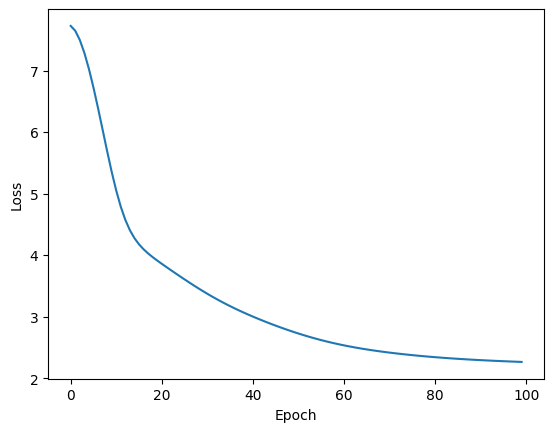

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# enable this to see the weights, biases, and losses
# print("\nWeights: ", W)
# print("\nBias: ", b)
# print("\nLoss: ", losses)